In [1]:
from pandas import read_csv
from matplotlib import pyplot
import sys
import numpy as np
import pandas as pd
from datetime import datetime
from keras.utils import to_categorical


In [2]:
colors = ['#BB0000', '#0000BB', 'green','red', 'yellow', 'pink']

def prinUserSensorData(dataS, label,s):
    df = pd.DataFrame()
    ts=[]
    ls=[]
    #print(dataS.shape)
    for t in range(0,dataS.shape[0]):
        ts.append(dataS[t][0])
    df['Time']=ts
    #print(ts)
#    for s in range(1,dataS.shape[1]):
    ls.append(label+" #column-"+str(s))
    #print(dataS[:,s].shape)
    df[label+" #column-"+str(s)]=dataS[:,s]

    print(ls)
    
    df.plot(x="Time",y=ls,subplots=True, legend=True, figsize=(15,5), color=colors[s-1])    
    


In [3]:
import math

folder="./data2023"

users=["MigueOK"]
files=["der2","der3","izq2","izq3","sim1","sim2"]
#users=["NoelOK"]
#files=["der1","der3","izq1","izq2","sim1","sim3"]


cross=[0,1,0,1,0,1]

sensors=[
    "s1",
    "s2"]


tW=list(range(-2500,100,50))

print(tW)
print(len(tW))

tStep=150

index_t=0


def getAVG(vs):
    if (len(vs)==0):
        return 0
    if(math.isnan(np.median(vs))):
        return -1
    return (np.median(vs))



def smoothData(data):
    #print("data:",data)
    for ix in range(1,6):
        data[:,ix]=data[:,ix].astype(float)
        lastV=0.0
        for jx in range(0,len(data[:,ix])):
            data[jx][ix]=data[jx][ix]*0.2+lastV*0.8
            lastV=data[jx][ix]
    #print("smooth data:",data)
    
    
def smoothDataTime(data):
    #print("data:",data)
    data[:,0]=data[:,0].astype(float)
    tA=[]
    lastT=-1
    for jx in range(0,len(data[:,0])):
        t0=data[jx][0]
        if(t0>lastT+50):
            lastT=t0
            tA.append(t0)

    retV=np.zeros((len(tA),7))
    for ix in range(1,7):
        data[:,ix]=data[:,ix].astype(float)
        lastT=-1
        lV=[]
        vA=[]
        for jx in range(0,len(data[:,ix])):
            t0=data[jx][0]
            if(t0>lastT+50):
                lastT=t0
                vA.append(np.median(lV))
                lV=[]
            else:
                lV.append(data[jx][ix])
        retV[:,ix]=np.array(vA)
    retV[:,0]=np.array(tA)
    return retV
    
def cleanDataFile(filename):
    ret = []
    count = 0
    with open(filename) as file:
        next(file)
        for line0 in file:
            count += 1
            line = line0.strip()
            line = line.replace(',', '.').split('\t')
            if len(line) != 7:
                print("NOT 13# in ", count, " -> ", line)
                continue
            try:
                ret.append([float(x) for x in line])
            except ValueError as e:
                print("Error in line ", line, ":", e)
    return ret

        
def getLabels(t0,labels):
    for l in labels:
            if(t0>= l[0] and t0<= l[1]):
                return l[2]
    return None
    
            




[-2500, -2450, -2400, -2350, -2300, -2250, -2200, -2150, -2100, -2050, -2000, -1950, -1900, -1850, -1800, -1750, -1700, -1650, -1600, -1550, -1500, -1450, -1400, -1350, -1300, -1250, -1200, -1150, -1100, -1050, -1000, -950, -900, -850, -800, -750, -700, -650, -600, -550, -500, -450, -400, -350, -300, -250, -200, -150, -100, -50, 0, 50]
52


In [4]:
#for ixu,us in enumerate(users):    
    #for ixc,cl in enumerate(files):
            #for isx,sn in enumerate(sensors):
                #idx_sensor[sn]=[]
                #print(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                #data=cleanDataFile(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                #data=np.array(data)
                #print(data.shape)
                #data=smoothDataTime(data)
                #print(data.shape)
                #for s in range(1,7):
                #    prinUserSensorData(data, "us:"+us+"file:"+cl+"#sensor:"+sn,s)

In [5]:
X=[]
Y=[]
S=[]
N=0



for ixu,us in enumerate(users):    
    for ixc,cl in enumerate(files):
            t0=0
            tMaxMin=sys.maxsize 
            interval=False
            #idx_sensor={}
            sensorData={}
            for isx,sn in enumerate(sensors):
                #idx_sensor[sn]=[]
                print(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                data=cleanDataFile(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                data=np.array(data)
                smoothData(data)
                #prinUserSensorData(data)
                sensorData[sn]=data
                tMax=0
                tMin=sys.maxsize 
                for ixd,d in enumerate(data):
                    #idx_sensor[sn].append(ixd)
                    if(d[index_t]>tMax):
                        tMax=d[index_t]
                    if(d[index_t]<tMin):
                        tMin=d[index_t]                        
                tMaxMin=min(tMaxMin,tMax-tMin)
                
            labels=read_csv(folder+"/"+us+"/"+cl+"/info.txt", sep="\t",parse_dates=True,header=None, decimal=".")
            labels=labels.values
            print(labels)
            
            tMaxMin=int(tMaxMin)
            print(cl," tMaxMin:",tMaxMin)
                        
            for t in range(0-min(tW),tMaxMin-max(tW),tStep):
                print(t/(tMaxMin-max(tW))*100, "t#",t)
                
                label=getLabels(t,labels)
                if (not label):
                    continue
                xi=[]
                for sn in sensors:
                    data=sensorData[sn]
                    tRef=np.min(data[:,index_t])

                    
                    xi1=[]
                    xi2=[]
                    xi3=[]
                    xi4=[]
                    xi5=[]
                    xi6=[]
                    for it in range(len(tW)-2,-1,-1):

                        tr=t+tRef+np.random.normal(0, 25)

                        t0=tr+tW[it]
                        tN=tr+tW[it+1]
                        ag1=data[np.where((data[:,index_t] >= t0) & (data[:,index_t] <=  tN))]
                        #print("\t t0,tN,#,t,it,tRef",t0,tN,len(ag1),t,it,tW[it],tRef)
                        #print("cl",cl,"sc",sc,"sn",sn,"t+:",t,"tRef:",tRef,"t0:",t0,"tN:",tN," ag1:", ag1)
                        #ag0=data[np.where((data[:,index_t] >= tr-5000) & (data[:,index_t] <=  tr+5000))]
                        
                        

                        #añadimos info sensores inerciales
                        xi1.append(getAVG(ag1[:,4].astype(float)))
                        xi2.append(getAVG(ag1[:,5].astype(float)))
                        xi3.append(getAVG(ag1[:,6].astype(float)))
                        
                        #xi4.append(getAVG(ag1[:,4].astype(np.float)))
                        #xi5.append(getAVG(ag1[:,5].astype(np.float)))
                        #xi6.append(getAVG(ag1[:,6].astype(np.float)))                        

                    #print("\t",np.array(xi1).shape)
                    xi.append(xi1)
                    xi.append(xi2)
                    xi.append(xi3)
                    #xi.append(xi4)
                    #xi.append(xi5)
                    #xi.append(xi6)

                #print("",np.array(xi).shape)    
                X.append(np.transpose(xi))
                Y.append(label)
                S.append(cross[ixc])

        
X=np.array(X)
S=np.array(S)
Y=np.array(Y)

print(X.shape)
print(Y.shape)    
print(S.shape) 

                

./data2023/MigueOK/der2/s1.txt
./data2023/MigueOK/der2/s2.txt
[[6258 33505 'der']
 [56200 83500 'der']
 [106200 131500 'der']
 [156300 184400 'der']
 [212500 238400 'der']]
der2  tMaxMin: 260644
0.959346723255332 t# 2500
1.016907526650652 t# 2650
1.0744683300459719 t# 2800
1.132029133441292 t# 2950
1.1895899368366116 t# 3100
1.2471507402319317 t# 3250
1.3047115436272516 t# 3400
1.3622723470225715 t# 3550
1.4198331504178914 t# 3700
1.4773939538132113 t# 3850
1.5349547572085314 t# 4000
1.592515560603851 t# 4150
1.6500763639991711 t# 4300
1.707637167394491 t# 4450
1.7651979707898109 t# 4600
1.822758774185131 t# 4750
1.8803195775804509 t# 4900
1.937880380975771 t# 5050
1.9954411843710904 t# 5200
2.0530019877664105 t# 5350
2.1105627911617306 t# 5500
2.1681235945570503 t# 5650
2.2256843979523704 t# 5800
2.2832452013476905 t# 5950
2.34080600474301 t# 6100
2.3983668081383303 t# 6250
2.4559276115336504 t# 6400
2.51348841492897 t# 6550
2.5710492183242897 t# 6700
2.62861002171961 t# 6850
2.686170

22.08416156933774 t# 57550
22.141722372733064 t# 57700
22.199283176128386 t# 57850
22.2568439795237 t# 58000
22.314404782919024 t# 58150
22.371965586314342 t# 58300
22.429526389709665 t# 58450
22.487087193104983 t# 58600
22.544647996500302 t# 58750
22.602208799895624 t# 58900
22.659769603290943 t# 59050
22.717330406686262 t# 59200
22.774891210081584 t# 59350
22.832452013476903 t# 59500
22.890012816872225 t# 59650
22.94757362026754 t# 59800
23.005134423662863 t# 59950
23.06269522705818 t# 60100
23.120256030453504 t# 60250
23.177816833848823 t# 60400
23.23537763724414 t# 60550
23.292938440639464 t# 60700
23.35049924403478 t# 60850
23.4080600474301 t# 61000
23.465620850825424 t# 61150
23.523181654220743 t# 61300
23.58074245761606 t# 61450
23.63830326101138 t# 61600
23.695864064406702 t# 61750
23.75342486780202 t# 61900
23.81098567119734 t# 62050
23.868546474592662 t# 62200
23.92610727798798 t# 62350
23.983668081383303 t# 62500
24.04122888477862 t# 62650
24.09878968817394 t# 62800
24.15635

41.3094699033746 t# 107650
41.36703070676992 t# 107800
41.424591510165236 t# 107950
41.482152313560555 t# 108100
41.53971311695588 t# 108250
41.5972739203512 t# 108400
41.65483472374652 t# 108550
41.71239552714184 t# 108700
41.769956330537156 t# 108850
41.82751713393248 t# 109000
41.8850779373278 t# 109150
41.94263874072311 t# 109300
42.00019954411844 t# 109450
42.05776034751376 t# 109600
42.11532115090908 t# 109750
42.1728819543044 t# 109900
42.23044275769971 t# 110050
42.28800356109504 t# 110200
42.34556436449036 t# 110350
42.403125167885676 t# 110500
42.460685971280995 t# 110650
42.518246774676314 t# 110800
42.57580757807163 t# 110950
42.63336838146696 t# 111100
42.69092918486228 t# 111250
42.748489988257596 t# 111400
42.806050791652915 t# 111550
42.86361159504823 t# 111700
42.92117239844356 t# 111850
42.97873320183888 t# 112000
43.0362940052342 t# 112150
43.093854808629516 t# 112300
43.151415612024834 t# 112450
43.20897641542015 t# 112600
43.26653721881548 t# 112750
43.324098022210

60.59233904080678 t# 157900
60.649899844202096 t# 158050
60.70746064759741 t# 158200
60.76502145099273 t# 158350
60.822582254388045 t# 158500
60.88014305778338 t# 158650
60.93770386117869 t# 158800
60.99526466457401 t# 158950
61.05282546796933 t# 159100
61.110386271364646 t# 159250
61.16794707475998 t# 159400
61.22550787815529 t# 159550
61.28306868155061 t# 159700
61.34062948494593 t# 159850
61.39819028834125 t# 160000
61.455751091736566 t# 160150
61.51331189513189 t# 160300
61.57087269852721 t# 160450
61.62843350192253 t# 160600
61.68599430531785 t# 160750
61.74355510871317 t# 160900
61.80111591210849 t# 161050
61.85867671550381 t# 161200
61.91623751889913 t# 161350
61.97379832229445 t# 161500
62.03135912568977 t# 161650
62.088919929085094 t# 161800
62.14648073248041 t# 161950
62.20404153587573 t# 162100
62.26160233927105 t# 162250
62.31916314266637 t# 162400
62.37672394606169 t# 162550
62.434284749457014 t# 162700
62.49184555285233 t# 162850
62.54940635624765 t# 163000
62.60696715964

82.00495790386579 t# 213700
82.0625187072611 t# 213850
82.12007951065642 t# 214000
82.17764031405174 t# 214150
82.23520111744706 t# 214300
82.29276192084238 t# 214450
82.3503227242377 t# 214600
82.40788352763302 t# 214750
82.46544433102835 t# 214900
82.52300513442367 t# 215050
82.58056593781899 t# 215200
82.63812674121431 t# 215350
82.69568754460963 t# 215500
82.75324834800493 t# 215650
82.81080915140026 t# 215800
82.86836995479558 t# 215950
82.9259307581909 t# 216100
82.98349156158622 t# 216250
83.04105236498154 t# 216400
83.09861316837687 t# 216550
83.15617397177219 t# 216700
83.21373477516751 t# 216850
83.27129557856281 t# 217000
83.32885638195813 t# 217150
83.38641718535345 t# 217300
83.44397798874878 t# 217450
83.5015387921441 t# 217600
83.55909959553942 t# 217750
83.61666039893474 t# 217900
83.67422120233006 t# 218050
83.73178200572539 t# 218200
83.7893428091207 t# 218350
83.84690361251602 t# 218500
83.90446441591133 t# 218650
83.96202521930665 t# 218800
84.01958602270199 t# 2189

./data2023/MigueOK/der3/s2.txt
[[8878 35400 'der']
 [56200 85700 'der']
 [103530 133109 'der']
 [156700 186300 'der']
 [210000 236600 'der']
 [257300 286900 'der']]
der3  tMaxMin: 311798
0.8019297637835688 t# 2500
0.8500455496105829 t# 2650
0.898161335437597 t# 2800
0.946277121264611 t# 2950
0.9943929070916253 t# 3100
1.0425086929186396 t# 3250
1.0906244787456534 t# 3400
1.1387402645726676 t# 3550
1.186856050399682 t# 3700
1.234971836226696 t# 3850
1.28308762205371 t# 4000
1.3312034078807242 t# 4150
1.3793191937077383 t# 4300
1.4274349795347525 t# 4450
1.4755507653617665 t# 4600
1.5236665511887806 t# 4750
1.5717823370157948 t# 4900
1.619898122842809 t# 5050
1.6680139086698231 t# 5200
1.716129694496837 t# 5350
1.7642454803238512 t# 5500
1.8123612661508655 t# 5650
1.8604770519778797 t# 5800
1.9085928378048937 t# 5950
1.956708623631908 t# 6100
2.004824409458922 t# 6250
2.052940195285936 t# 6400
2.10105598111295 t# 6550
2.1491717669399644 t# 6700
2.1972875527669786 t# 6850
2.24540333859399

18.364191590643724 t# 57250
18.41230737647074 t# 57400
18.460423162297754 t# 57550
18.508538948124766 t# 57700
18.55665473395178 t# 57850
18.604770519778796 t# 58000
18.652886305605808 t# 58150
18.701002091432827 t# 58300
18.749117877259838 t# 58450
18.79723366308685 t# 58600
18.84534944891387 t# 58750
18.89346523474088 t# 58900
18.941581020567895 t# 59050
18.98969680639491 t# 59200
19.037812592221922 t# 59350
19.085928378048937 t# 59500
19.134044163875952 t# 59650
19.182159949702964 t# 59800
19.23027573552998 t# 59950
19.278391521356994 t# 60100
19.326507307184006 t# 60250
19.374623093011024 t# 60400
19.422738878838036 t# 60550
19.470854664665048 t# 60700
19.518970450492066 t# 60850
19.567086236319078 t# 61000
19.615202022146093 t# 61150
19.663317807973108 t# 61300
19.71143359380012 t# 61450
19.759549379627135 t# 61600
19.80766516545415 t# 61750
19.85578095128116 t# 61900
19.903896737108177 t# 62050
19.952012522935192 t# 62200
20.000128308762203 t# 62350
20.04824409458922 t# 62500
20.

33.6168956978072 t# 104800
33.66501148363422 t# 104950
33.71312726946123 t# 105100
33.76124305528825 t# 105250
33.80935884111526 t# 105400
33.85747462694228 t# 105550
33.905590412769286 t# 105700
33.9537061985963 t# 105850
34.001821984423316 t# 106000
34.04993777025033 t# 106150
34.098053556077346 t# 106300
34.14616934190436 t# 106450
34.19428512773137 t# 106600
34.242400913558384 t# 106750
34.2905166993854 t# 106900
34.338632485212415 t# 107050
34.38674827103943 t# 107200
34.434864056866445 t# 107350
34.48297984269345 t# 107500
34.53109562852047 t# 107650
34.57921141434749 t# 107800
34.6273272001745 t# 107950
34.675442986001514 t# 108100
34.72355877182853 t# 108250
34.771674557655544 t# 108400
34.81979034348255 t# 108550
34.867906129309574 t# 108700
34.91602191513658 t# 108850
34.9641377009636 t# 109000
35.01225348679061 t# 109150
35.06036927261763 t# 109300
35.10848505844464 t# 109450
35.15660084427166 t# 109600
35.20471663009867 t# 109750
35.25283241592568 t# 109900
35.3009482017526

50.6498838805702 t# 157900
50.69799966639722 t# 158050
50.74611545222423 t# 158200
50.794231238051246 t# 158350
50.84234702387826 t# 158500
50.89046280970527 t# 158650
50.93857859553229 t# 158800
50.9866943813593 t# 158950
51.034810167186315 t# 159100
51.08292595301334 t# 159250
51.131041738840345 t# 159400
51.17915752466736 t# 159550
51.22727331049437 t# 159700
51.27538909632139 t# 159850
51.323504882148406 t# 160000
51.371620667975414 t# 160150
51.419736453802436 t# 160300
51.467852239629444 t# 160450
51.51596802545646 t# 160600
51.56408381128347 t# 160750
51.61219959711049 t# 160900
51.660315382937505 t# 161050
51.70843116876451 t# 161200
51.75654695459153 t# 161350
51.804662740418536 t# 161500
51.85277852624556 t# 161650
51.90089431207257 t# 161800
51.94901009789958 t# 161950
51.9971258837266 t# 162100
52.04524166955361 t# 162250
52.09335745538063 t# 162400
52.14147324120765 t# 162550
52.18958902703466 t# 162700
52.23770481286167 t# 162850
52.28582059868868 t# 163000
52.33393638451

67.58664049167918 t# 210700
67.6347562775062 t# 210850
67.6828720633332 t# 211000
67.73098784916021 t# 211150
67.77910363498724 t# 211300
67.82721942081425 t# 211450
67.87533520664127 t# 211600
67.92345099246828 t# 211750
67.97156677829528 t# 211900
68.0196825641223 t# 212050
68.06779834994931 t# 212200
68.11591413577634 t# 212350
68.16402992160334 t# 212500
68.21214570743037 t# 212650
68.26026149325737 t# 212800
68.30837727908438 t# 212950
68.3564930649114 t# 213100
68.40460885073841 t# 213250
68.45272463656543 t# 213400
68.50084042239246 t# 213550
68.54895620821947 t# 213700
68.59707199404647 t# 213850
68.64518777987348 t# 214000
68.6933035657005 t# 214150
68.74141935152751 t# 214300
68.78953513735453 t# 214450
68.83765092318154 t# 214600
68.88576670900855 t# 214750
68.93388249483557 t# 214900
68.98199828066258 t# 215050
69.0301140664896 t# 215200
69.07822985231662 t# 215350
69.12634563814363 t# 215500
69.17446142397064 t# 215650
69.22257720979765 t# 215800
69.27069299562467 t# 21595

83.0318077421507 t# 258850
83.07992352797773 t# 259000
83.12803931380473 t# 259150
83.17615509963176 t# 259300
83.22427088545878 t# 259450
83.27238667128579 t# 259600
83.3205024571128 t# 259750
83.3686182429398 t# 259900
83.41673402876683 t# 260050
83.46484981459383 t# 260200
83.51296560042086 t# 260350
83.56108138624788 t# 260500
83.60919717207487 t# 260650
83.6573129579019 t# 260800
83.7054287437289 t# 260950
83.75354452955592 t# 261100
83.80166031538295 t# 261250
83.84977610120995 t# 261400
83.89789188703696 t# 261550
83.94600767286397 t# 261700
83.99412345869099 t# 261850
84.04223924451802 t# 262000
84.09035503034502 t# 262150
84.13847081617205 t# 262300
84.18658660199905 t# 262450
84.23470238782606 t# 262600
84.28281817365307 t# 262750
84.33093395948009 t# 262900
84.37904974530711 t# 263050
84.42716553113412 t# 263200
84.47528131696114 t# 263350
84.52339710278814 t# 263500
84.57151288861516 t# 263650
84.61962867444218 t# 263800
84.66774446026919 t# 263950
84.71586024609621 t# 2641

./data2023/MigueOK/izq2/s2.txt
[[3328 29900 'izq']
 [46500 73100 'izq']
 [89720 116313 'izq']
 [136250 162800 'izq']
 [179000 206000 'izq']
 [225900 252500 'izq']]
izq2  tMaxMin: 273971
0.9126719017526951 t# 2500
0.9674322158578568 t# 2650
1.0221925299630186 t# 2800
1.0769528440681801 t# 2950
1.131713158173342 t# 3100
1.1864734722785037 t# 3250
1.2412337863836653 t# 3400
1.2959941004888271 t# 3550
1.350754414593989 t# 3700
1.4055147286991505 t# 3850
1.460275042804312 t# 4000
1.5150353569094739 t# 4150
1.5697956710146357 t# 4300
1.6245559851197973 t# 4450
1.6793162992249593 t# 4600
1.7340766133301206 t# 4750
1.7888369274352822 t# 4900
1.8435972415404442 t# 5050
1.8983575556456058 t# 5200
1.9531178697507676 t# 5350
2.007878183855929 t# 5500
2.062638497961091 t# 5650
2.1173988120662526 t# 5800
2.1721591261714144 t# 5950
2.226919440276576 t# 6100
2.2816797543817375 t# 6250
2.3364400684868993 t# 6400
2.391200382592061 t# 6550
2.445960696697223 t# 6700
2.5007210108023847 t# 6850
2.5554813249

17.39552644740637 t# 47650
17.45028676151153 t# 47800
17.50504707561669 t# 47950
17.559807389721854 t# 48100
17.614567703827017 t# 48250
17.66932801793218 t# 48400
17.72408833203734 t# 48550
17.7788486461425 t# 48700
17.833608960247663 t# 48850
17.888369274352826 t# 49000
17.94312958845799 t# 49150
17.997889902563145 t# 49300
18.052650216668308 t# 49450
18.10741053077347 t# 49600
18.162170844878634 t# 49750
18.216931158983797 t# 49900
18.271691473088953 t# 50050
18.326451787194117 t# 50200
18.38121210129928 t# 50350
18.435972415404443 t# 50500
18.490732729509602 t# 50650
18.545493043614762 t# 50800
18.600253357719925 t# 50950
18.65501367182509 t# 51100
18.70977398593025 t# 51250
18.76453430003541 t# 51400
18.81929461414057 t# 51550
18.874054928245734 t# 51700
18.928815242350897 t# 51850
18.98357555645606 t# 52000
19.03833587056122 t# 52150
19.093096184666383 t# 52300
19.147856498771542 t# 52450
19.202616812876705 t# 52600
19.25737712698187 t# 52750
19.312137441087028 t# 52900
19.366897

34.097422249480694 t# 93400
34.15218256358585 t# 93550
34.20694287769101 t# 93700
34.26170319179617 t# 93850
34.31646350590133 t# 94000
34.3712238200065 t# 94150
34.42598413411166 t# 94300
34.48074444821682 t# 94450
34.535504762321985 t# 94600
34.590265076427144 t# 94750
34.64502539053231 t# 94900
34.69978570463747 t# 95050
34.75454601874263 t# 95200
34.80930633284779 t# 95350
34.86406664695295 t# 95500
34.918826961058116 t# 95650
34.973587275163275 t# 95800
35.028347589268435 t# 95950
35.0831079033736 t# 96100
35.13786821747876 t# 96250
35.19262853158393 t# 96400
35.24738884568909 t# 96550
35.30214915979425 t# 96700
35.356909473899414 t# 96850
35.411669788004566 t# 97000
35.46643010210973 t# 97150
35.52119041621489 t# 97300
35.57595073032005 t# 97450
35.63071104442522 t# 97600
35.68547135853038 t# 97750
35.740231672635545 t# 97900
35.794991986740705 t# 98050
35.849752300845864 t# 98200
35.90451261495103 t# 98350
35.95927292905618 t# 98500
36.01403324316135 t# 98650
36.06879355726651 t

50.689797423344686 t# 138850
50.744557737449846 t# 139000
50.79931805155501 t# 139150
50.85407836566017 t# 139300
50.90883867976533 t# 139450
50.9635989938705 t# 139600
51.01835930797566 t# 139750
51.07311962208082 t# 139900
51.127879936185984 t# 140050
51.18264025029114 t# 140200
51.23740056439631 t# 140350
51.29216087850147 t# 140500
51.34692119260663 t# 140650
51.401681506711796 t# 140800
51.456441820816956 t# 140950
51.51120213492211 t# 141100
51.56596244902727 t# 141250
51.620722763132434 t# 141400
51.675483077237594 t# 141550
51.73024339134275 t# 141700
51.78500370544792 t# 141850
51.83976401955308 t# 142000
51.89452433365824 t# 142150
51.949284647763406 t# 142300
52.004044961868566 t# 142450
52.05880527597373 t# 142600
52.11356559007889 t# 142750
52.16832590418405 t# 142900
52.22308621828922 t# 143050
52.27784653239438 t# 143200
52.332606846499544 t# 143350
52.387367160604704 t# 143500
52.442127474709864 t# 143650
52.49688778881503 t# 143800
52.55164810292019 t# 143950
52.606408

66.62504882794674 t# 182500
66.67980914205191 t# 182650
66.73456945615706 t# 182800
66.78932977026223 t# 182950
66.8440900843674 t# 183100
66.89885039847255 t# 183250
66.95361071257771 t# 183400
67.00837102668288 t# 183550
67.06313134078805 t# 183700
67.1178916548932 t# 183850
67.17265196899837 t# 184000
67.22741228310353 t# 184150
67.28217259720869 t# 184300
67.33693291131385 t# 184450
67.391693225419 t# 184600
67.44645353952417 t# 184750
67.50121385362932 t# 184900
67.55597416773449 t# 185050
67.61073448183966 t# 185200
67.66549479594481 t# 185350
67.72025511004998 t# 185500
67.77501542415514 t# 185650
67.8297757382603 t# 185800
67.88453605236546 t# 185950
67.93929636647063 t# 186100
67.99405668057578 t# 186250
68.04881699468095 t# 186400
68.10357730878611 t# 186550
68.15833762289128 t# 186700
68.21309793699643 t# 186850
68.2678582511016 t# 187000
68.32261856520677 t# 187150
68.37737887931192 t# 187300
68.43213919341709 t# 187450
68.48689950752224 t# 187600
68.5416598216274 t# 187750

83.32694463002106 t# 228250
83.38170494412623 t# 228400
83.43646525823138 t# 228550
83.49122557233655 t# 228700
83.54598588644171 t# 228850
83.60074620054687 t# 229000
83.65550651465203 t# 229150
83.7102668287572 t# 229300
83.76502714286235 t# 229450
83.81978745696752 t# 229600
83.87454777107268 t# 229750
83.92930808517785 t# 229900
83.984068399283 t# 230050
84.03882871338817 t# 230200
84.09358902749334 t# 230350
84.14834934159849 t# 230500
84.20310965570366 t# 230650
84.25786996980882 t# 230800
84.31263028391398 t# 230950
84.36739059801913 t# 231100
84.4221509121243 t# 231250
84.47691122622946 t# 231400
84.53167154033461 t# 231550
84.58643185443978 t# 231700
84.64119216854495 t# 231850
84.6959524826501 t# 232000
84.75071279675527 t# 232150
84.80547311086043 t# 232300
84.86023342496559 t# 232450
84.91499373907075 t# 232600
84.96975405317592 t# 232750
85.02451436728109 t# 232900
85.07927468138624 t# 233050
85.1340349954914 t# 233200
85.18879530959657 t# 233350
85.24355562370172 t# 23350

./data2023/MigueOK/izq3/s2.txt
[[3328 29900 'izq']
 [46500 73100 'izq']
 [89720 116313 'izq']
 [136250 162800 'izq']
 [179000 206000 'izq']
 [225900 252500 'izq']]
izq3  tMaxMin: 273971
0.9126719017526951 t# 2500
0.9674322158578568 t# 2650
1.0221925299630186 t# 2800
1.0769528440681801 t# 2950
1.131713158173342 t# 3100
1.1864734722785037 t# 3250
1.2412337863836653 t# 3400
1.2959941004888271 t# 3550
1.350754414593989 t# 3700
1.4055147286991505 t# 3850
1.460275042804312 t# 4000
1.5150353569094739 t# 4150
1.5697956710146357 t# 4300
1.6245559851197973 t# 4450
1.6793162992249593 t# 4600
1.7340766133301206 t# 4750
1.7888369274352822 t# 4900
1.8435972415404442 t# 5050
1.8983575556456058 t# 5200
1.9531178697507676 t# 5350
2.007878183855929 t# 5500
2.062638497961091 t# 5650
2.1173988120662526 t# 5800
2.1721591261714144 t# 5950
2.226919440276576 t# 6100
2.2816797543817375 t# 6250
2.3364400684868993 t# 6400
2.391200382592061 t# 6550
2.445960696697223 t# 6700
2.5007210108023847 t# 6850
2.5554813249

17.286005819196046 t# 47350
17.34076613330121 t# 47500
17.39552644740637 t# 47650
17.45028676151153 t# 47800
17.50504707561669 t# 47950
17.559807389721854 t# 48100
17.614567703827017 t# 48250
17.66932801793218 t# 48400
17.72408833203734 t# 48550
17.7788486461425 t# 48700
17.833608960247663 t# 48850
17.888369274352826 t# 49000
17.94312958845799 t# 49150
17.997889902563145 t# 49300
18.052650216668308 t# 49450
18.10741053077347 t# 49600
18.162170844878634 t# 49750
18.216931158983797 t# 49900
18.271691473088953 t# 50050
18.326451787194117 t# 50200
18.38121210129928 t# 50350
18.435972415404443 t# 50500
18.490732729509602 t# 50650
18.545493043614762 t# 50800
18.600253357719925 t# 50950
18.65501367182509 t# 51100
18.70977398593025 t# 51250
18.76453430003541 t# 51400
18.81929461414057 t# 51550
18.874054928245734 t# 51700
18.928815242350897 t# 51850
18.98357555645606 t# 52000
19.03833587056122 t# 52150
19.093096184666383 t# 52300
19.147856498771542 t# 52450
19.202616812876705 t# 52600
19.257377

33.768860364849715 t# 92500
33.82362067895488 t# 92650
33.87838099306004 t# 92800
33.9331413071652 t# 92950
33.98790162127037 t# 93100
34.04266193537553 t# 93250
34.097422249480694 t# 93400
34.15218256358585 t# 93550
34.20694287769101 t# 93700
34.26170319179617 t# 93850
34.31646350590133 t# 94000
34.3712238200065 t# 94150
34.42598413411166 t# 94300
34.48074444821682 t# 94450
34.535504762321985 t# 94600
34.590265076427144 t# 94750
34.64502539053231 t# 94900
34.69978570463747 t# 95050
34.75454601874263 t# 95200
34.80930633284779 t# 95350
34.86406664695295 t# 95500
34.918826961058116 t# 95650
34.973587275163275 t# 95800
35.028347589268435 t# 95950
35.0831079033736 t# 96100
35.13786821747876 t# 96250
35.19262853158393 t# 96400
35.24738884568909 t# 96550
35.30214915979425 t# 96700
35.356909473899414 t# 96850
35.411669788004566 t# 97000
35.46643010210973 t# 97150
35.52119041621489 t# 97300
35.57595073032005 t# 97450
35.63071104442522 t# 97600
35.68547135853038 t# 97750
35.740231672635545 t# 

49.97791333997759 t# 136900
50.03267365408275 t# 137050
50.08743396818791 t# 137200
50.142194282293076 t# 137350
50.196954596398236 t# 137500
50.251714910503395 t# 137650
50.30647522460856 t# 137800
50.36123553871372 t# 137950
50.415995852818874 t# 138100
50.47075616692403 t# 138250
50.5255164810292 t# 138400
50.58027679513436 t# 138550
50.63503710923952 t# 138700
50.689797423344686 t# 138850
50.744557737449846 t# 139000
50.79931805155501 t# 139150
50.85407836566017 t# 139300
50.90883867976533 t# 139450
50.9635989938705 t# 139600
51.01835930797566 t# 139750
51.07311962208082 t# 139900
51.127879936185984 t# 140050
51.18264025029114 t# 140200
51.23740056439631 t# 140350
51.29216087850147 t# 140500
51.34692119260663 t# 140650
51.401681506711796 t# 140800
51.456441820816956 t# 140950
51.51120213492211 t# 141100
51.56596244902727 t# 141250
51.620722763132434 t# 141400
51.675483077237594 t# 141550
51.73024339134275 t# 141700
51.78500370544792 t# 141850
51.83976401955308 t# 142000
51.89452433

66.18696631510545 t# 181300
66.2417266292106 t# 181450
66.29648694331577 t# 181600
66.35124725742094 t# 181750
66.40600757152609 t# 181900
66.46076788563126 t# 182050
66.51552819973642 t# 182200
66.57028851384158 t# 182350
66.62504882794674 t# 182500
66.67980914205191 t# 182650
66.73456945615706 t# 182800
66.78932977026223 t# 182950
66.8440900843674 t# 183100
66.89885039847255 t# 183250
66.95361071257771 t# 183400
67.00837102668288 t# 183550
67.06313134078805 t# 183700
67.1178916548932 t# 183850
67.17265196899837 t# 184000
67.22741228310353 t# 184150
67.28217259720869 t# 184300
67.33693291131385 t# 184450
67.391693225419 t# 184600
67.44645353952417 t# 184750
67.50121385362932 t# 184900
67.55597416773449 t# 185050
67.61073448183966 t# 185200
67.66549479594481 t# 185350
67.72025511004998 t# 185500
67.77501542415514 t# 185650
67.8297757382603 t# 185800
67.88453605236546 t# 185950
67.93929636647063 t# 186100
67.99405668057578 t# 186250
68.04881699468095 t# 186400
68.10357730878611 t# 18655

83.16266368770559 t# 227800
83.21742400181074 t# 227950
83.2721843159159 t# 228100
83.32694463002106 t# 228250
83.38170494412623 t# 228400
83.43646525823138 t# 228550
83.49122557233655 t# 228700
83.54598588644171 t# 228850
83.60074620054687 t# 229000
83.65550651465203 t# 229150
83.7102668287572 t# 229300
83.76502714286235 t# 229450
83.81978745696752 t# 229600
83.87454777107268 t# 229750
83.92930808517785 t# 229900
83.984068399283 t# 230050
84.03882871338817 t# 230200
84.09358902749334 t# 230350
84.14834934159849 t# 230500
84.20310965570366 t# 230650
84.25786996980882 t# 230800
84.31263028391398 t# 230950
84.36739059801913 t# 231100
84.4221509121243 t# 231250
84.47691122622946 t# 231400
84.53167154033461 t# 231550
84.58643185443978 t# 231700
84.64119216854495 t# 231850
84.6959524826501 t# 232000
84.75071279675527 t# 232150
84.80547311086043 t# 232300
84.86023342496559 t# 232450
84.91499373907075 t# 232600
84.96975405317592 t# 232750
85.02451436728109 t# 232900
85.07927468138624 t# 23305

./data2023/MigueOK/sim1/s2.txt
[[3837 26823 'sim']
 [42147 68964 'sim']
 [88119 113000 'sim']
 [133500 157070 'sim']
 [180060 204300 'sim']
 [226000 249000 'sim']]
sim1  tMaxMin: 271412
0.9212785872745632 t# 2500
0.9765553025110368 t# 2650
1.0318320177475107 t# 2800
1.0871087329839844 t# 2950
1.1423854482204583 t# 3100
1.197662163456932 t# 3250
1.252938878693406 t# 3400
1.3082155939298796 t# 3550
1.3634923091663536 t# 3700
1.4187690244028273 t# 3850
1.474045739639301 t# 4000
1.529322454875775 t# 4150
1.5845991701122486 t# 4300
1.6398758853487225 t# 4450
1.6951526005851962 t# 4600
1.7504293158216702 t# 4750
1.8057060310581439 t# 4900
1.8609827462946176 t# 5050
1.916259461531091 t# 5200
1.971536176767565 t# 5350
2.0268128920040387 t# 5500
2.0820896072405124 t# 5650
2.1373663224769865 t# 5800
2.1926430377134603 t# 5950
2.247919752949934 t# 6100
2.3031964681864077 t# 6250
2.3584731834228814 t# 6400
2.4137498986593555 t# 6550
2.4690266138958292 t# 6700
2.524303329132303 t# 6850
2.5795800443

17.670123303926122 t# 47950
17.725400019162596 t# 48100
17.780676734399066 t# 48250
17.835953449635543 t# 48400
17.891230164872017 t# 48550
17.94650688010849 t# 48700
18.001783595344964 t# 48850
18.057060310581438 t# 49000
18.11233702581791 t# 49150
18.167613741054385 t# 49300
18.22289045629086 t# 49450
18.278167171527333 t# 49600
18.333443886763806 t# 49750
18.38872060200028 t# 49900
18.443997317236754 t# 50050
18.499274032473227 t# 50200
18.5545507477097 t# 50350
18.609827462946175 t# 50500
18.66510417818265 t# 50650
18.720380893419122 t# 50800
18.775657608655596 t# 50950
18.83093432389207 t# 51100
18.886211039128543 t# 51250
18.94148775436502 t# 51400
18.996764469601494 t# 51550
19.052041184837964 t# 51700
19.107317900074438 t# 51850
19.162594615310912 t# 52000
19.217871330547386 t# 52150
19.273148045783863 t# 52300
19.328424761020337 t# 52450
19.38370147625681 t# 52600
19.43897819149328 t# 52750
19.494254906729754 t# 52900
19.549531621966228 t# 53050
19.6048083372027 t# 53200
19.66

34.5847981662871 t# 93850
34.640074881523574 t# 94000
34.69535159676005 t# 94150
34.75062831199652 t# 94300
34.805905027232996 t# 94450
34.86118174246947 t# 94600
34.91645845770594 t# 94750
34.97173517294242 t# 94900
35.02701188817889 t# 95050
35.082288603415364 t# 95200
35.13756531865184 t# 95350
35.19284203388831 t# 95500
35.248118749124785 t# 95650
35.30339546436126 t# 95800
35.35867217959773 t# 95950
35.413948894834206 t# 96100
35.46922561007068 t# 96250
35.524502325307154 t# 96400
35.57977904054363 t# 96550
35.6350557557801 t# 96700
35.690332471016575 t# 96850
35.74560918625305 t# 97000
35.80088590148952 t# 97150
35.856162616725996 t# 97300
35.91143933196247 t# 97450
35.96671604719894 t# 97600
36.02199276243542 t# 97750
36.07726947767189 t# 97900
36.132546192908364 t# 98050
36.18782290814484 t# 98200
36.24309962338131 t# 98350
36.298376338617786 t# 98500
36.35365305385426 t# 98650
36.40892976909073 t# 98800
36.464206484327214 t# 98950
36.51948319956369 t# 99100
36.57475991480016 t

51.00198259151981 t# 138400
51.057259306756286 t# 138550
51.11253602199276 t# 138700
51.167812737229234 t# 138850
51.22308945246571 t# 139000
51.27836616770218 t# 139150
51.333642882938655 t# 139300
51.38891959817513 t# 139450
51.4441963134116 t# 139600
51.49947302864808 t# 139750
51.55474974388456 t# 139900
51.61002645912103 t# 140050
51.665303174357504 t# 140200
51.72057988959398 t# 140350
51.77585660483045 t# 140500
51.831133320066925 t# 140650
51.8864100353034 t# 140800
51.94168675053987 t# 140950
51.996963465776346 t# 141100
52.05224018101282 t# 141250
52.107516896249294 t# 141400
52.16279361148577 t# 141550
52.21807032672224 t# 141700
52.27334704195871 t# 141850
52.32862375719518 t# 142000
52.383900472431655 t# 142150
52.43917718766813 t# 142300
52.4944539029046 t# 142450
52.549730618141076 t# 142600
52.60500733337755 t# 142750
52.660284048614024 t# 142900
52.7155607638505 t# 143050
52.77083747908697 t# 143200
52.826114194323445 t# 143350
52.881390909559926 t# 143500
52.936667624

67.41916701675254 t# 182950
67.47444373198901 t# 183100
67.52972044722547 t# 183250
67.58499716246195 t# 183400
67.64027387769842 t# 183550
67.6955505929349 t# 183700
67.75082730817137 t# 183850
67.80610402340784 t# 184000
67.86138073864431 t# 184150
67.91665745388079 t# 184300
67.97193416911726 t# 184450
68.02721088435374 t# 184600
68.08248759959021 t# 184750
68.13776431482668 t# 184900
68.19304103006316 t# 185050
68.24831774529963 t# 185200
68.3035944605361 t# 185350
68.35887117577258 t# 185500
68.41414789100907 t# 185650
68.46942460624554 t# 185800
68.52470132148201 t# 185950
68.57997803671849 t# 186100
68.63525475195496 t# 186250
68.69053146719143 t# 186400
68.74580818242791 t# 186550
68.80108489766438 t# 186700
68.85636161290086 t# 186850
68.91163832813733 t# 187000
68.9669150433738 t# 187150
69.02219175861028 t# 187300
69.07746847384675 t# 187450
69.13274518908322 t# 187600
69.1880219043197 t# 187750
69.24329861955616 t# 187900
69.29857533479263 t# 188050
69.3538520500291 t# 1882

84.00218158769466 t# 227950
84.05745830293114 t# 228100
84.11273501816761 t# 228250
84.16801173340409 t# 228400
84.22328844864056 t# 228550
84.27856516387703 t# 228700
84.3338418791135 t# 228850
84.38911859434998 t# 229000
84.44439530958647 t# 229150
84.49967202482293 t# 229300
84.5549487400594 t# 229450
84.61022545529588 t# 229600
84.66550217053235 t# 229750
84.72077888576882 t# 229900
84.7760556010053 t# 230050
84.83133231624177 t# 230200
84.88660903147824 t# 230350
84.94188574671472 t# 230500
84.99716246195119 t# 230650
85.05243917718767 t# 230800
85.10771589242414 t# 230950
85.16299260766061 t# 231100
85.21826932289709 t# 231250
85.27354603813356 t# 231400
85.32882275337003 t# 231550
85.38409946860651 t# 231700
85.43937618384298 t# 231850
85.49465289907945 t# 232000
85.54992961431593 t# 232150
85.6052063295524 t# 232300
85.66048304478888 t# 232450
85.71575976002535 t# 232600
85.77103647526184 t# 232750
85.82631319049831 t# 232900
85.88158990573478 t# 233050
85.93686662097126 t# 233

1.5415412807385502 t# 3550
1.6066768278120103 t# 3700
1.6718123748854699 t# 3850
1.7369479219589299 t# 4000
1.80208346903239 t# 4150
1.8672190161058495 t# 4300
1.9323545631793095 t# 4450
1.9974901102527693 t# 4600
2.062625657326229 t# 4750
2.127761204399689 t# 4900
2.192896751473149 t# 5050
2.258032298546609 t# 5200
2.323167845620069 t# 5350
2.388303392693529 t# 5500
2.4534389397669885 t# 5650
2.5185744868404485 t# 5800
2.5837100339139085 t# 5950
2.648845580987368 t# 6100
2.713981128060828 t# 6250
2.7791166751342877 t# 6400
2.8442522222077478 t# 6550
2.9093877692812073 t# 6700
2.9745233163546674 t# 6850
3.0396588634281274 t# 7000
3.104794410501587 t# 7150
3.169929957575047 t# 7300
3.235065504648507 t# 7450
3.3002010517219666 t# 7600
3.3653365987954267 t# 7750
3.4304721458688867 t# 7900
3.4956076929423463 t# 8050
3.560743240015806 t# 8200
3.6258787870892664 t# 8350
3.691014334162726 t# 8500
3.7561498812361855 t# 8650
3.821285428309646 t# 8800
3.8864209753831056 t# 8950
3.951556522456565

21.342747591070353 t# 49150
21.40788313814381 t# 49300
21.47301868521727 t# 49450
21.53815423229073 t# 49600
21.60328977936419 t# 49750
21.668425326437653 t# 49900
21.73356087351111 t# 50050
21.79869642058457 t# 50200
21.86383196765803 t# 50350
21.92896751473149 t# 50500
21.99410306180495 t# 50650
22.05923860887841 t# 50800
22.12437415595187 t# 50950
22.18950970302533 t# 51100
22.25464525009879 t# 51250
22.319780797172246 t# 51400
22.38491634424571 t# 51550
22.45005189131917 t# 51700
22.51518743839263 t# 51850
22.58032298546609 t# 52000
22.645458532539546 t# 52150
22.71059407961301 t# 52300
22.775729626686466 t# 52450
22.840865173759926 t# 52600
22.90600072083339 t# 52750
22.971136267906846 t# 52900
23.036271814980307 t# 53050
23.101407362053767 t# 53200
23.166542909127227 t# 53350
23.231678456200687 t# 53500
23.296814003274147 t# 53650
23.361949550347607 t# 53800
23.427085097421067 t# 53950
23.492220644494527 t# 54100
23.557356191567987 t# 54250
23.622491738641447 t# 54400
23.68762728

41.73017382506329 t# 96100
41.79530937213675 t# 96250
41.86044491921021 t# 96400
41.92558046628367 t# 96550
41.99071601335713 t# 96700
42.05585156043059 t# 96850
42.12098710750405 t# 97000
42.18612265457751 t# 97150
42.25125820165097 t# 97300
42.31639374872443 t# 97450
42.38152929579789 t# 97600
42.44666484287135 t# 97750
42.51180038994481 t# 97900
42.57693593701827 t# 98050
42.64207148409172 t# 98200
42.70720703116519 t# 98350
42.77234257823865 t# 98500
42.8374781253121 t# 98650
42.90261367238557 t# 98800
42.96774921945903 t# 98950
43.03288476653249 t# 99100
43.09802031360594 t# 99250
43.16315586067941 t# 99400
43.22829140775287 t# 99550
43.29342695482632 t# 99700
43.35856250189979 t# 99850
43.42369804897325 t# 100000
43.4888335960467 t# 100150
43.55396914312016 t# 100300
43.61910469019363 t# 100450
43.68424023726708 t# 100600
43.74937578434054 t# 100750
43.81451133141401 t# 100900
43.87964687848746 t# 101050
43.94478242556092 t# 101200
44.00991797263439 t# 101350
44.07505351970784 t#

61.9873289649093 t# 142750
62.05246451198278 t# 142900
62.11760005905623 t# 143050
62.18273560612969 t# 143200
62.24787115320315 t# 143350
62.31300670027661 t# 143500
62.37814224735006 t# 143650
62.44327779442352 t# 143800
62.50841334149699 t# 143950
62.57354888857045 t# 144100
62.63868443564391 t# 144250
62.70381998271737 t# 144400
62.76895552979083 t# 144550
62.83409107686428 t# 144700
62.89922662393774 t# 144850
62.96436217101121 t# 145000
63.02949771808467 t# 145150
63.09463326515813 t# 145300
63.15976881223159 t# 145450
63.22490435930504 t# 145600
63.2900399063785 t# 145750
63.35517545345196 t# 145900
63.42031100052543 t# 146050
63.48544654759889 t# 146200
63.55058209467235 t# 146350
63.6157176417458 t# 146500
63.68085318881926 t# 146650
63.74598873589272 t# 146800
63.81112428296618 t# 146950
63.87625983003965 t# 147100
63.94139537711311 t# 147250
64.00653092418656 t# 147400
64.07166647126003 t# 147550
64.13680201833348 t# 147700
64.20193756540694 t# 147850
64.2670731124804 t# 148

81.13717980450652 t# 186850
81.20231535157997 t# 187000
81.26745089865342 t# 187150
81.33258644572689 t# 187300
81.39772199280036 t# 187450
81.46285753987381 t# 187600
81.52799308694728 t# 187750
81.59312863402073 t# 187900
81.65826418109418 t# 188050
81.72339972816765 t# 188200
81.78853527524112 t# 188350
81.85367082231457 t# 188500
81.91880636938804 t# 188650
81.98394191646149 t# 188800
82.04907746353494 t# 188950
82.11421301060841 t# 189100
82.17934855768186 t# 189250
82.24448410475533 t# 189400
82.3096196518288 t# 189550
82.37475519890225 t# 189700
82.4398907459757 t# 189850
82.50502629304917 t# 190000
82.57016184012262 t# 190150
82.63529738719609 t# 190300
82.70043293426956 t# 190450
82.76556848134301 t# 190600
82.83070402841646 t# 190750
82.89583957548993 t# 190900
82.96097512256338 t# 191050
83.02611066963685 t# 191200
83.09124621671032 t# 191350
83.15638176378377 t# 191500
83.22151731085722 t# 191650
83.28665285793069 t# 191800
83.35178840500414 t# 191950
83.41692395207761 t# 1

In [6]:
unq,tags = np.unique(Y, return_inverse=True)
print(tags)
print(Y)
print(S)

Y=tags
print(np.unique(Y))

[0 0 0 ... 2 2 2]
['der' 'der' 'der' ... 'sim' 'sim' 'sim']
[0 0 0 ... 1 1 1]
[0 1 2]


(5965,)
(5965,)
(5965,)
(5965,)
(5965,)
(5965,)
['sensor-0', 'sensor-1', 'sensor-2', 'sensor-3', 'sensor-4', 'sensor-5', 'Scene', 'Label']


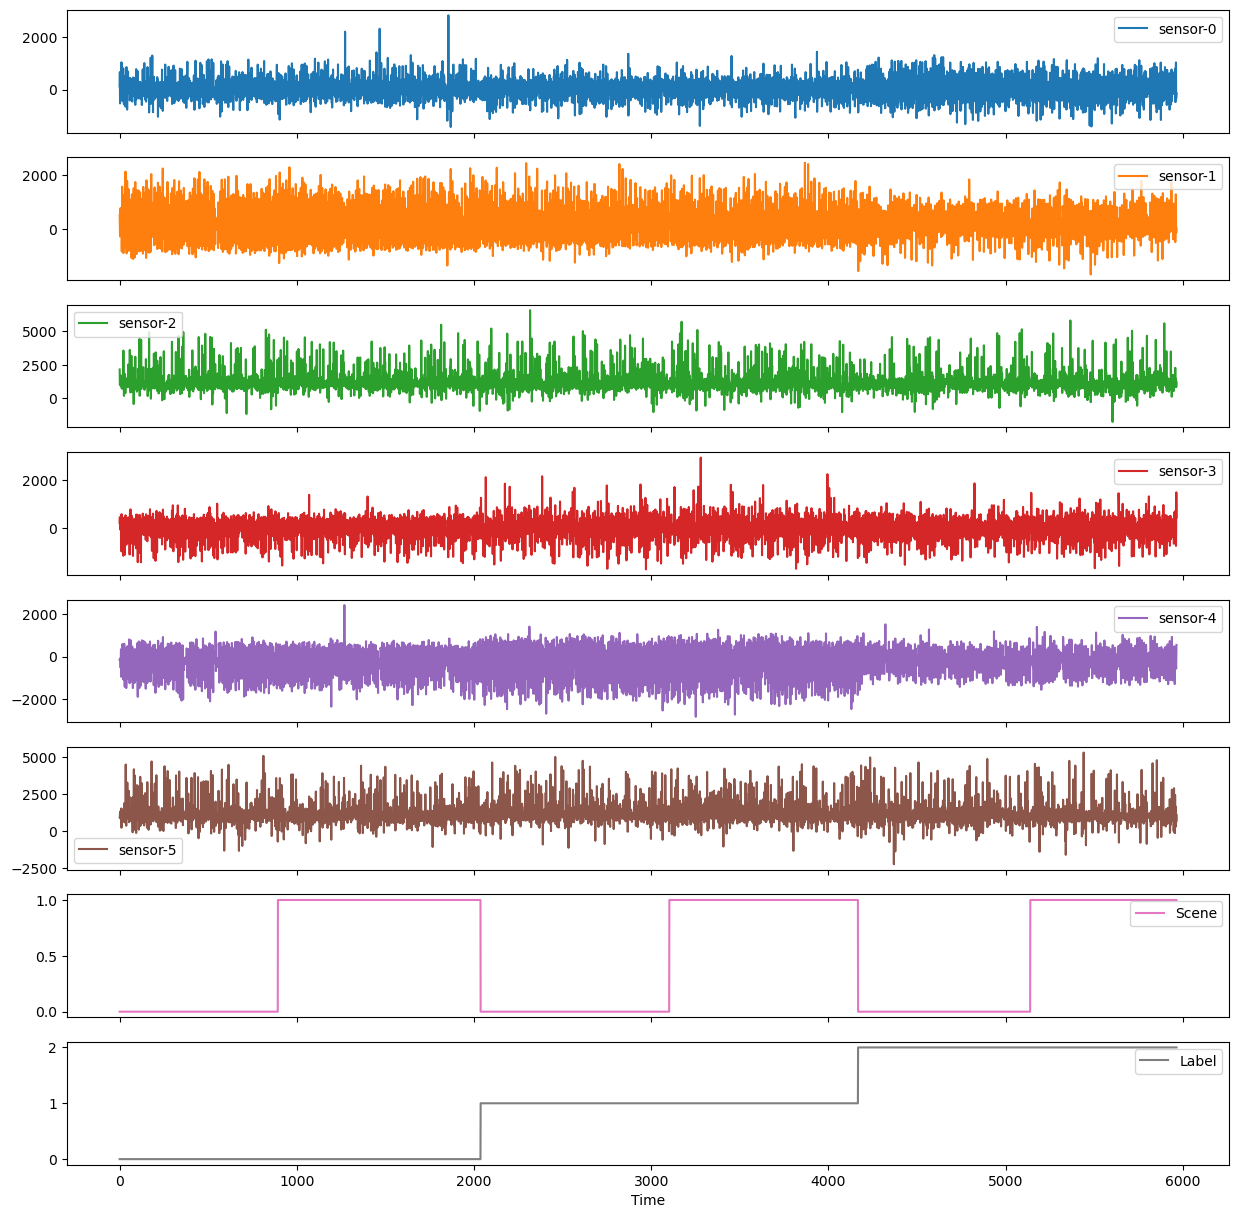

In [7]:
def prinUserSensorMatrix(S,L,Y):
    df = pd.DataFrame()
    ts=[]
    ls=[]
    
    for t in range(0,X.shape[0]):
        ts.append(t)
    df['Time']=ts
    #print(ts)
    for s in range(0,X.shape[2]):
        ls.append("sensor-"+str(s))
        vs=S[:,:,s]
        vs=vs[:,0]
        print(vs.shape)
        df["sensor-"+str(s)]=vs
    

    
    ss=[]
    for t in range(0,X.shape[0]):
        ss.append(L[t])
    df['Scene']=ss
    ls.append('Scene')
    
    ys=[]
    for t in range(0,X.shape[0]):
        ys.append(Y[t])
    df['Label']=ys
    ls.append('Label')

    print(ls)
    
    df.plot(x="Time",y=ls,subplots=True, legend=True, figsize=(15,15))    
    
prinUserSensorMatrix(X,S,Y)

In [8]:
print(X)       
print(X.shape)       

[[[ 112.5947394   520.88110496 2146.55        209.09716142 -147.97623423
    940.15      ]
  [  -8.41374391  233.80487407  999.56        -90.35344152  -55.90217628
   1256.6       ]
  [ -28.7950467   135.17984259 1021.385      -551.18809877 -140.96535884
    864.49      ]
  ...
  [ -43.13013102  -54.85944318 1031.085       -57.49027466   34.81995625
    991.31      ]
  [ -40.83009432  -55.98162955 1030.6         -57.46135525   34.82563175
    991.31      ]
  [ -41.09377797  -55.98162955 1030.6         -56.9652343    34.95204722
    992.525     ]]

 [[ 671.39612068   91.98010089 1003.44        447.45800454 -185.14760642
    992.28      ]
  [2112.35011655 -153.05648879  399.385       467.86440364 -185.97861959
   1071.82      ]
  [ 112.5947394   520.88110496 2146.55        220.62974882 -147.97623423
    963.915     ]
  ...
  [ -42.14607474  -58.5425903  1030.84        -58.38069897   34.03271006
    990.585     ]
  [ -43.64260744  -57.14911441 1033.02        -57.80061748   35.06904284
   

In [9]:
Y=to_categorical(Y)

In [10]:
print("nan:",np.argwhere(np.isnan(X)))
print(X[np.argwhere(np.isnan(X))])

nan: []
[]


In [11]:
from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt



classes=["der","izq","sim"]

Y_pred_total=np.array([])
Y_val_total=np.array([])


for sceneid in np.unique(S):

    print("SCENE:",sceneid)
    index_test=np.where(S == sceneid)[0]
    index_train=np.where(S != sceneid)[0]

    print("index_test",index_test)
    print("index_train",index_train)

    x_train=X[index_train]
    x_val=X[index_test]
    y_train=Y[index_train]
    y_val=Y[index_test]

    #normalizamos valores (18 valores=6 señales imu x 3 sensores)
    for ixv in range(0,X.shape[2]):
        print(x_train[:,:,ixv])
        avg_v=np.nanmean(x_train[:,:,ixv].flatten())
        std_v=np.nanstd(x_train[:,:,ixv].flatten())
        print("avg_v,std_v:",avg_v,std_v)
        x_train[:,:,ixv]=(x_train[:,:,ixv]-avg_v)/(std_v)
        x_val[:,:,ixv]=(x_val[:,:,ixv]-avg_v)/(std_v)

    model = keras.Sequential()

    model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(X.shape[1],X.shape[2])))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(Dropout(0.25))

    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.25))
    model.add(LSTM(256))

    model.add(Flatten())
    model.add(Dense(2048))
    model.add(Dense(1024))
    model.add(Dense(len(classes), activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop',  metrics=['accuracy'])
    model.summary()

    history = model.fit(x_train , y_train,
                        batch_size=64,
                validation_data=(x_val,y_val),
                epochs=25)


    y_pred = model.predict(x_val).argmax(axis=1)
    y_val=y_val.argmax(axis=1)
    print(y_pred)
    print(y_val)
    Y_pred_total=np.concatenate((Y_pred_total,y_pred))
    Y_val_total=np.concatenate((Y_val_total,y_val))

    

    

SCENE: 0
index_test [   0    1    2 ... 5136 5137 5138]
index_train [ 893  894  895 ... 5962 5963 5964]
[[ 229.84455098 -270.32370357 -358.1197133  ...  -32.64495643
   -30.73481446  -29.91283509]
 [-935.84435905 -935.84435905  317.40940699 ...  -33.29429797
   -32.24443085  -34.43997415]
 [ -69.51050636  103.88433534 -101.58875122 ...   -4.27806741
    41.80184404  -41.16034999]
 ...
 [-347.69303897 -644.99949318 -164.9804581  ... -254.54251004
  -351.93818367 -359.63903699]
 [-251.30083959 -238.28528005 -229.17117107 ... -104.2628589
  -175.59799142 -185.82501384]
 [-145.51000985 -180.04519675 -131.93095638 ...  501.02738038
   478.96975967   91.744724  ]]
avg_v,std_v: 16.810803714975215 378.5968830331662
[[1307.04817843  829.26886222  633.63932812 ...  233.6783528
   231.27080765  230.43387439]
 [ 959.28205336  959.28205336 1259.76241615 ...  229.38472571
   227.7625062   231.58851795]
 [ 165.19504583  284.49808475  387.48200743 ...  304.21663612
   222.2703495   172.12948362]
 ...


46/46 [==============================] - 22s 484ms/step - loss: 0.1052 - accuracy: 0.9645 - val_loss: 0.0660 - val_accuracy: 0.9809
Epoch 12/25
46/46 [==============================] - 23s 506ms/step - loss: 0.0828 - accuracy: 0.9700 - val_loss: 0.0386 - val_accuracy: 0.9829
Epoch 13/25
46/46 [==============================] - 22s 470ms/step - loss: 0.0488 - accuracy: 0.9833 - val_loss: 0.3109 - val_accuracy: 0.9463
Epoch 14/25
46/46 [==============================] - 22s 473ms/step - loss: 0.0883 - accuracy: 0.9805 - val_loss: 0.0927 - val_accuracy: 0.9759
Epoch 15/25
46/46 [==============================] - 21s 468ms/step - loss: 0.1049 - accuracy: 0.9758 - val_loss: 0.0673 - val_accuracy: 0.9779
Epoch 16/25
46/46 [==============================] - 22s 470ms/step - loss: 0.0389 - accuracy: 0.9901 - val_loss: 0.0798 - val_accuracy: 0.9730
Epoch 17/25
46/46 [==============================] - 22s 471ms/step - loss: 0.0389 - accuracy: 0.9891 - val_loss: 0.0325 - val_accuracy: 0.9895
Epoc

[2. 2. 2. ... 2. 2. 2.]
[0. 0. 0. ... 2. 2. 2.]
[[1947   22   68]
 [   1 2127    2]
 [   8   26 1764]]
Classification Report TOTAL
              precision    recall  f1-score   support

         der       1.00      0.96      0.98      2037
         izq       0.98      1.00      0.99      2130
         sim       0.96      0.98      0.97      1798

    accuracy                           0.98      5965
   macro avg       0.98      0.98      0.98      5965
weighted avg       0.98      0.98      0.98      5965



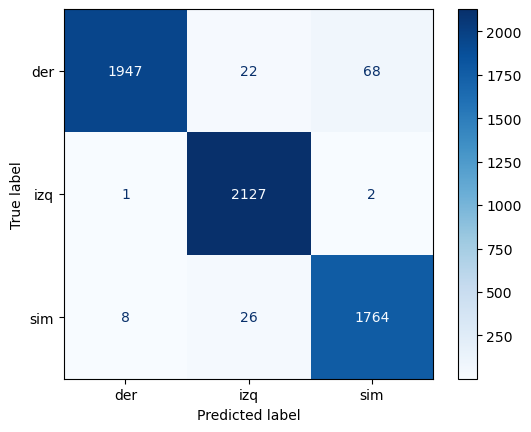

In [12]:
print(Y_pred_total)
print(Y_val_total)

cm = confusion_matrix(Y_val_total, Y_pred_total) 
print(cm)
print('Classification Report TOTAL')
print(classification_report(Y_val_total, Y_pred_total, target_names=classes))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot(cmap=plt.cm.Blues)
plt.show()